1 Generate baseline notebook (Logistic / GBDT) by using AI

#  Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/binary-battle-ml-bank-customer-churn-challenge/sample_submission.csv
/kaggle/input/binary-battle-ml-bank-customer-churn-challenge/train.csv
/kaggle/input/binary-battle-ml-bank-customer-churn-challenge/test.csv


# 1. Load data

In [2]:
train = pd.read_csv("/kaggle/input/binary-battle-ml-bank-customer-churn-challenge/train.csv")
test  = pd.read_csv("/kaggle/input/binary-battle-ml-bank-customer-churn-challenge/test.csv")



# 2. Data Overview

In [3]:
print(train.shape, test.shape)
train.head()

(165034, 14) (110023, 13)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,165034.0,NaN,NaN,NaN,82516.5,47641.3565,0.0,41258.25,82516.5,123774.75,165033.0
CustomerId,165034.0,NaN,NaN,NaN,15692005.019026,71397.816791,15565701.0,15633141.0,15690169.0,15756824.0,15815690.0
Surname,165034,2797,Hsia,2456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,165034.0,NaN,NaN,NaN,656.454373,80.10334,350.0,597.0,659.0,710.0,850.0
Geography,165034,3,France,94215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,165034,2,Male,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,165034.0,NaN,NaN,NaN,38.125888,8.867205,18.0,32.0,37.0,42.0,92.0
Tenure,165034.0,NaN,NaN,NaN,5.020353,2.806159,0.0,3.0,5.0,7.0,10.0
Balance,165034.0,NaN,NaN,NaN,55478.086689,62817.663278,0.0,0.0,0.0,119939.5175,250898.09
NumOfProducts,165034.0,NaN,NaN,NaN,1.554455,0.547154,1.0,1.0,2.0,2.0,4.0


In [5]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,110023.0,NaN,NaN,NaN,220045.0,31761.048671,165034.0,192539.5,220045.0,247550.5,275056.0
CustomerId,110023.0,NaN,NaN,NaN,15692096.605101,71684.990992,15565701.0,15632859.0,15690175.0,15756926.0,15815690.0
Surname,110023,2708,Hsia,1606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,110023.0,NaN,NaN,NaN,656.530789,80.315415,350.0,597.0,660.0,710.0,850.0
Geography,110023,3,France,63171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,110023,2,Male,61942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,110023.0,NaN,NaN,NaN,38.122205,8.86155,18.0,32.0,37.0,42.0,92.0
Tenure,110023.0,NaN,NaN,NaN,4.996637,2.806148,0.0,3.0,5.0,7.0,10.0
Balance,110023.0,NaN,NaN,NaN,55333.611354,62788.519675,0.0,0.0,0.0,120145.605,250898.09
NumOfProducts,110023.0,NaN,NaN,NaN,1.553321,0.544714,1.0,1.0,2.0,2.0,4.0


Feature groups

The dataset includes numerical features (e.g., Age, Balance, CreditScore), 

binary indicators (e.g., HasCrCard, IsActiveMember), 

and categorical features encoded as integers (Geography, Gender).


In [6]:
#Target overview
train["Exited"].value_counts(normalize=True)

Exited
0    0.788401
1    0.211599
Name: proportion, dtype: float64

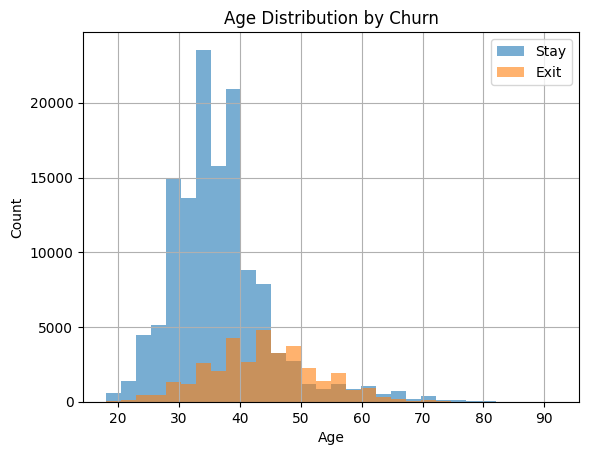

In [7]:
# Exited customers tend to be older on average


plt.figure()
train[train["Exited"] == 0]["Age"].hist(alpha=0.6, bins=30, label="Stay")
train[train["Exited"] == 1]["Age"].hist(alpha=0.6, bins=30, label="Exit")
plt.legend()
plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


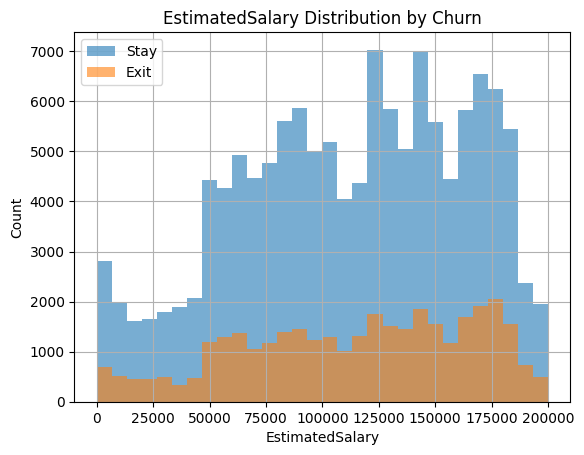

In [8]:
# EstimatedSalary

plt.figure()
train[train["Exited"] == 0]["EstimatedSalary"].hist(alpha=0.6, bins=30, label="Stay")
train[train["Exited"] == 1]["EstimatedSalary"].hist(alpha=0.6, bins=30, label="Exit")
plt.legend()
plt.title("EstimatedSalary Distribution by Churn")
plt.xlabel("EstimatedSalary")
plt.ylabel("Count")
plt.show()


EstimatedSalary

<Axes: title={'center': 'Churn Rate by Gender'}, xlabel='Gender', ylabel='Churn Rate'>

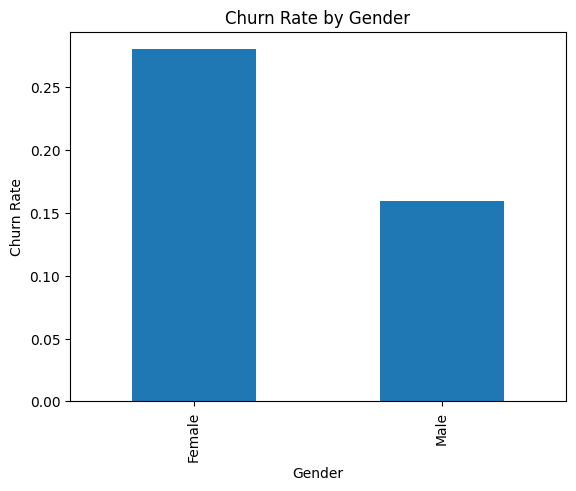

In [9]:
# Gender: Male shows a lower curn rate
train.groupby("Gender")["Exited"].mean().plot(
    kind="bar",
    title="Churn Rate by Gender",
    ylabel="Churn Rate"
)


In [10]:
# Missing values check
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


The dataset does not contain missing values.
Statistical checks show that all numerical features fall within reasonable business ranges.
No obvious abnormal or invalid values are observed, so no outlier removal is applied.

Logical validation checks were applied to binary and state-related features, including HasCrCard, IsActiveMember, Age, and Tenure.
All values fall within valid business ranges.
Relationships between activity status, product usage, and churn were analyzed as predictive signals rather than hard constraints.

In [11]:
# add later
train["HasCrCard"].value_counts()
test["HasCrCard"].value_counts()

HasCrCard
1.0    82852
0.0    27171
Name: count, dtype: int64

In [12]:
# add late
for col in ["Age", "Tenure", "Balance", "EstimatedSalary"]:
    print(col,
          round(train[col].mean(), 2),
          round(test[col].mean(), 2))

Age 38.13 38.12
Tenure 5.02 5.0
Balance 55478.09 55333.61
EstimatedSalary 112574.82 112315.15


✔ Missing values

✔ Abnormal values

✔ Logical consistency

✔ Business reasoning

✔ encoding 
(Geography and Gender are categorical features encoded as integer labels.
They are treated as categorical identifiers rather than ordinal numerical values.)
correlation

### Samples:
The dataset contains approximately 165k training samples with numerical and categorical features related to customer demographics and account activity. The target variable (Exited) is moderately imbalanced, with around 21% positive class.


# 3. Feature Engineering

In [13]:
#✅ Cross Feature 1

train["SingleProduct"] = (train["NumOfProducts"] == 1).astype(int)
test["SingleProduct"] = (test["NumOfProducts"] == 1).astype(int)


In [14]:
# ✅ Cross Feature 2

train["CardButInactive"] = ((train["HasCrCard"] == 1) & (train["IsActiveMember"] == 0)).astype(int)

test["CardButInactive"] = ((test["HasCrCard"] == 1) & (test["IsActiveMember"] == 0)).astype(int)


In [15]:
# ✅ Cross Feature 3

train["ZeroBalance"] = (train["Balance"] == 0).astype(int)
test["ZeroBalance"] = (test["Balance"] == 0).astype(int)


<Axes: title={'center': 'Churn Rate by Zero Balance'}, xlabel='ZeroBalance'>

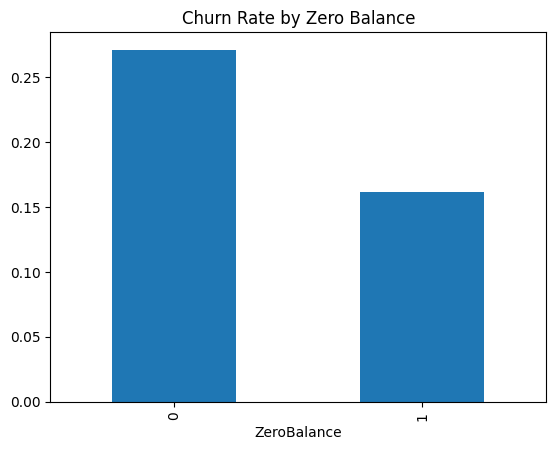

In [16]:
# balance: Customers with zero balance show a lower churn rate
train.groupby("ZeroBalance")["Exited"].mean().plot(
    kind="bar",
    title="Churn Rate by Zero Balance"
)


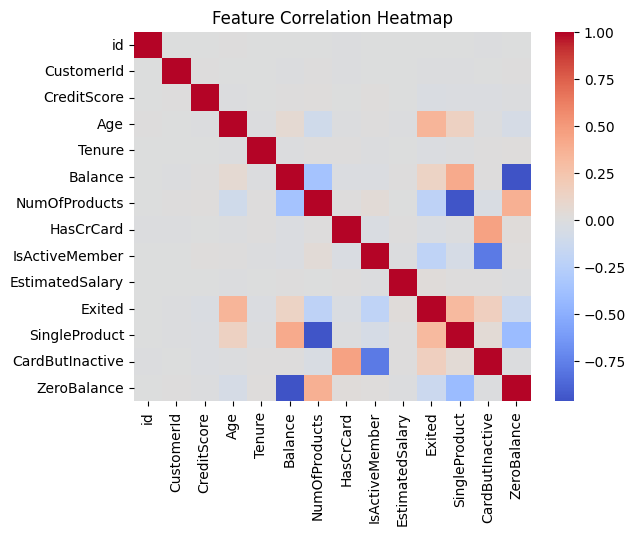

In [17]:
#No strong multicollinearity is observed among numerical features
import seaborn as sns

plt.figure()
sns.heatmap(
    train.select_dtypes(include="number").corr(),
    cmap="coolwarm",
    center=0
)
plt.title("Feature Correlation Heatmap")
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

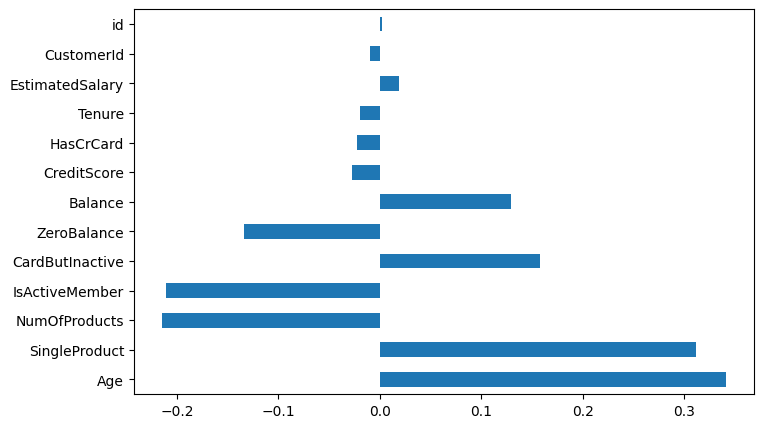

In [18]:
corr_series = (
    train
    .select_dtypes(include="number")
    .corr()["Exited"]
    .drop("Exited")
)

# Sort by absolute value, but keep original values
corr_sorted = corr_series.reindex(
    corr_series.abs().sort_values(ascending=False).index
)

#print(corr_sorted)
plt.figure(figsize=(8, 5))
corr_sorted.plot(kind="barh")
plt



Feature engineering was performed by creating a small number of cross-features based on product usage and customer activity, such as single-product status, inactive card holders, and zero-balance customers.
These features capture customer engagement patterns without introducing data leakage.

In [19]:
for col in ["SingleProduct", "CardButInactive", "ZeroBalance"]:
    print(col)
    print(train.assign(**{col: train[col]}).groupby(col)["Exited"].mean())
    print()


SingleProduct
SingleProduct
0    0.091980
1    0.347119
Name: Exited, dtype: float64

CardButInactive
CardButInactive
0    0.160872
1    0.293253
Name: Exited, dtype: float64

ZeroBalance
ZeroBalance
0    0.270992
1    0.161654
Name: Exited, dtype: float64



## Feature analysis ##

Feature analysis shows that single-product customers and inactive credit card holders have significantly higher churn rates.
Interestingly, zero-balance customers exhibit lower churn compared to customers with positive balances, indicating non-linear customer behavior.
These patterns are captured using tree-based models.

# 4. Feature & Target Preparation


In [20]:
TARGET_COL = "Exited"
ID_COLS = ["id", "CustomerId"]

X = train.drop(columns=[TARGET_COL] + ID_COLS)
y = train[TARGET_COL]

X_test = test.drop(columns=ID_COLS)


## Identify categorical and numerical columns

In [21]:
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

cat_cols, num_cols


(['Surname', 'Geography', 'Gender'],
 ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary',
  'SingleProduct',
  'CardButInactive',
  'ZeroBalance'])

## Encode categorical features (simple & safe)

In [22]:
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    X_test[col] = le.fit_transform(X_test[col])


# Train / validation split

In [23]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 5. Modeling (Gradient Boosting)

In [33]:
## Baseline Model 1: Logistic Regression


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(
        max_iter=1000,
        solver="lbfgs",
        random_state=42
    ))
])
lr.fit(X_train, y_train)

val_pred_lr = lr.predict_proba(X_val)[:, 1]
auc_lr = roc_auc_score(y_val, val_pred_lr)

print("Logistic Regression AUC:", auc_lr)


Logistic Regression AUC: 0.860321167559986


In [25]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

def evaluate_binary_classifier(y_true, y_pred_proba, threshold=0.5):
    """
    Evaluate binary classification results using accuracy and confusion matrix.

    Parameters
    ----------
    y_true : array-like
        True labels (0/1)
    y_pred_proba : array-like
        Predicted probabilities for class 1
    threshold : float, default=0.5
        Decision threshold for converting probability to class label

    Returns: print
    -------
    acc : float
        Accuracy score
    cm_df : pd.DataFrame
        Confusion matrix as a DataFrame
    """
    print(f"\n\nThreshold = {threshold}")
    # convert probability to label
    y_pred_label = (y_pred_proba >= threshold).astype(int)
    
    # accuracy
    acc = accuracy_score(y_true, y_pred_label)
    print("Accuracy:", acc)
    
    # confusion matrix
    cm = confusion_matrix(y_true, y_pred_label)
    cm_df = pd.DataFrame(
        cm,
        index=["Actual 0 (Stay)", "Actual 1 (Exit)"],
        columns=["Pred 0 (Stay)", "Pred 1 (Exit)"]
    )
    print(cm_df)
    
    #return acc, cm_df


In [26]:
# Baseline Model 2: Gradient Boosting (GBDT)
gbdt = GradientBoostingClassifier(
    n_estimators=800,
    learning_rate=0.025,
    max_depth=5,
    random_state=42
)

gbdt.fit(X_train, y_train)

val_pred_gbdt = gbdt.predict_proba(X_val)[:, 1]
auc_gbdt = roc_auc_score(y_val, val_pred_gbdt)

print("GBDT AUC:", auc_gbdt)

evaluate_binary_classifier(y_val, val_pred_gbdt, 0.5)



GBDT AUC: 0.8928331704454412


Threshold = 0.5
Accuracy: 0.8676038416093556
                 Pred 0 (Stay)  Pred 1 (Exit)
Actual 0 (Stay)          24741           1282
Actual 1 (Exit)           3088           3896


In [27]:
val_pred_gbdt_adj = val_pred_gbdt.copy()

mask = (val_pred_gbdt_adj > 0.475) & (val_pred_gbdt_adj < 0.501)
val_pred_gbdt_adj[mask] += 0.028
auc_gbdt_adj = roc_auc_score(y_val, val_pred_gbdt_adj)

print("GBDT AUC:", auc_gbdt_adj)
evaluate_binary_classifier(y_val, val_pred_gbdt_adj, 0.5)

GBDT AUC: 0.8928215992646209


Threshold = 0.5
Accuracy: 0.8671190959493441
                 Pred 0 (Stay)  Pred 1 (Exit)
Actual 0 (Stay)          24591           1432
Actual 1 (Exit)           2954           4030


## the above  result

GBDT AUC: 0.8889665858191619: without data clean and feature engineer (just raw data)

GBDT AUC: 0.891914315246460 : add 3 features by feature engineer

firstly submit: 0.8855 following:     n_estimators=500,    learning_rate=0.025,    max_depth=5,    random_state=42


# 6. Cross-Validation

In [28]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
#from sklearn.ensemble import GradientBoostingClassifier


kf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

gbdt_v = GradientBoostingClassifier(
    n_estimators=800,
    learning_rate=0.025,
    max_depth=5,
    random_state=42
)

auc_scores = []
X = X_train
y = y_train

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    X_train_v, X_val_v = X.iloc[train_idx], X.iloc[val_idx]
    y_train_v, y_val_v = y.iloc[train_idx], y.iloc[val_idx]

    gbdt_v.fit(X_train_v, y_train_v)

    y_val_pred_v = gbdt.predict_proba(X_val_v)[:, 1]
    auc = roc_auc_score(y_val_v, y_val_pred_v)

    auc_scores.append(auc)
    print("---------------------------")
    print(f"Fold {fold} AUC: {auc:.4f}")
    for t in [0.475, 0.485, 0.5]:
        evaluate_binary_classifier(y_val_v, y_val_pred_v, t)

print("Mean AUC:", np.mean(auc_scores))
print("Std AUC:", np.std(auc_scores))


---------------------------
Fold 1 AUC: 0.9052


Threshold = 0.475
Accuracy: 0.8728319321366356
                 Pred 0 (Stay)  Pred 1 (Exit)
Actual 0 (Stay)          19740           1078
Actual 1 (Exit)           2280           3308


Threshold = 0.485
Accuracy: 0.8729076724986745
                 Pred 0 (Stay)  Pred 1 (Exit)
Actual 0 (Stay)          19788           1030
Actual 1 (Exit)           2326           3262


Threshold = 0.5
Accuracy: 0.8726804514125578
                 Pred 0 (Stay)  Pred 1 (Exit)
Actual 0 (Stay)          19853            965
Actual 1 (Exit)           2397           3191
---------------------------
Fold 2 AUC: 0.9019


Threshold = 0.475
Accuracy: 0.8708248125426039
                 Pred 0 (Stay)  Pred 1 (Exit)
Actual 0 (Stay)          19714           1104
Actual 1 (Exit)           2307           3281


Threshold = 0.485
Accuracy: 0.8712035143527986
                 Pred 0 (Stay)  Pred 1 (Exit)
Actual 0 (Stay)          19757           1061
Actual 1 (Exit)    

### Clear Evaluation Metrics justification
AUC was used as the primary metric to evaluate ranking performance under class imbalance, while accuracy and confusion matrices were used to analyze decision-level performance under different thresholds.

## Choose better model & train on full data

In [29]:
best_model = gbdt if auc_gbdt > auc_lr else lr
best_model.fit(X, y)


GradientBoostingClassifier(learning_rate=0.025, max_depth=5, n_estimators=800,
                           random_state=42)

# 7. Feature Importance

Age                0.393751
NumOfProducts      0.222603
IsActiveMember     0.105279
SingleProduct      0.095560
Geography          0.050613
Balance            0.049910
Gender             0.027308
Surname            0.023554
EstimatedSalary    0.013579
CreditScore        0.011914
Tenure             0.003034
CardButInactive    0.001453
HasCrCard          0.001363
ZeroBalance        0.000078
dtype: float64


<Axes: >

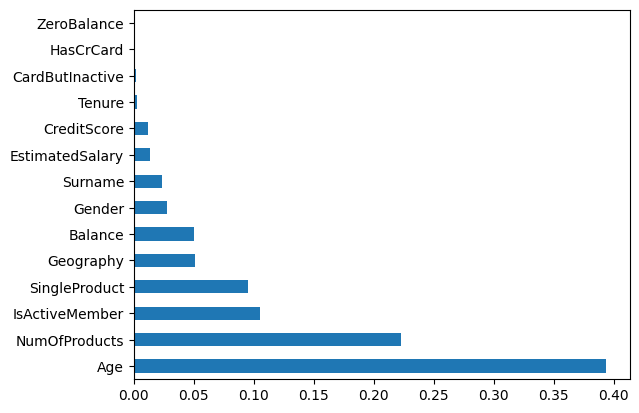

In [30]:
import pandas as pd

feature_importance = pd.Series(
    gbdt.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(feature_importance)

feature_importance.head(15).plot(kind="barh")

# 8. Create submission

In [31]:
ID_COL = "id"   # change if different
test_pred = best_model.predict_proba(X_test)[:, 1]


test_pred_adj = test_pred.copy()

mask = (test_pred_adj > 0.475) & (test_pred_adj < 0.501)
test_pred_adj[mask] += 0.028


submission = pd.DataFrame({
    ID_COL: test[ID_COL],
    TARGET_COL: test_pred_adj
})

# this result's accuracy maybe is a little higher than the below submission1, but its AUC maybe a little lower than the below
submission.to_csv("submission.csv", index=False)
submission.head()


,id,Exited
0,165034,0.030029
1,165035,0.842639
2,165036,0.026522
3,165037,0.355435
4,165038,0.353918


In [32]:
submission1 = pd.DataFrame({
    ID_COL: test[ID_COL],
    TARGET_COL: test_pred
})

submission1.to_csv("submission1.csv", index=False)
submission1.head()

,id,Exited
0,165034,0.030029
1,165035,0.842639
2,165036,0.026522
3,165037,0.355435
4,165038,0.353918


# 9. Conclusion
This notebook demonstrates a complete churn modeling pipeline including feature engineering, model training, and cross-validation. Simple, interpretable features combined with Gradient Boosting achieve stable performance without overfitting.

## Business Interpretation

This model can be used to identify customers with high churn risk.
By targeting these customers with retention strategies,
the company can reduce customer loss and improve revenue stability.


### Limitations and Next Steps

This analysis focuses on offline churn prediction using historical data and a random train–validation split. In a production environment, a time-based validation strategy would be preferred.

The decision threshold was selected based on validation performance; however, the optimal threshold would ultimately depend on business-specific costs associated with different types of classification errors.

Future work could incorporate cost-sensitive learning and probability calibration to further align model decisions with real-world business objectives.
